<a href="https://colab.research.google.com/github/Sharathdha06/Air-Quality-Index/blob/master/Moives_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,10)


In [6]:
#Read Data
df = pd.read_csv(r'movies.csv', encoding = 'latin-1')
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [7]:
#Data cleaning
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

There are no missing values


In [11]:
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [9]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [10]:
df['budget'] = df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [13]:
df['year_released'] = df['released'].astype(str).str[:4]

In [14]:
df.sort_values(by = ['gross'], inplace= False, ascending= False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_released
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [17]:
#Drop duplicates
df = df.drop_duplicates()


In [33]:
df = df.drop(['released','year'],axis = 1)

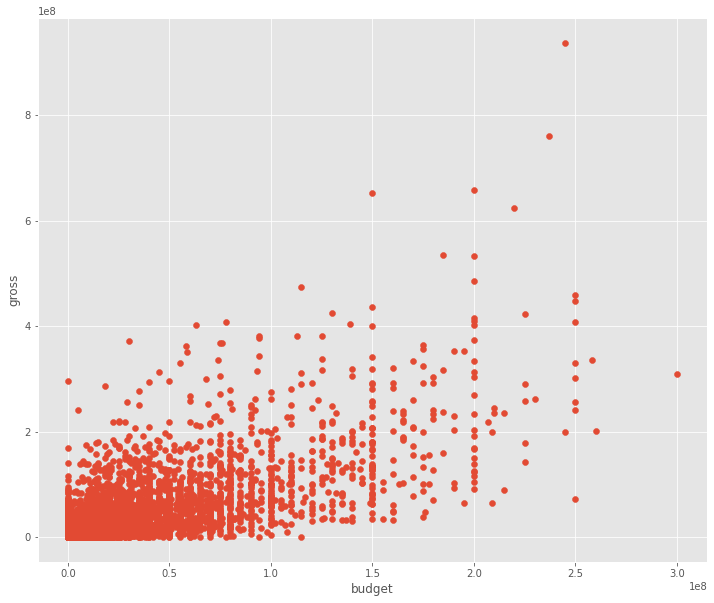

In [25]:
#Finding correlations
#Budget vs Gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.xlabel('budget of the movie')
plt.ylabel('gross earnings')
plt.show()


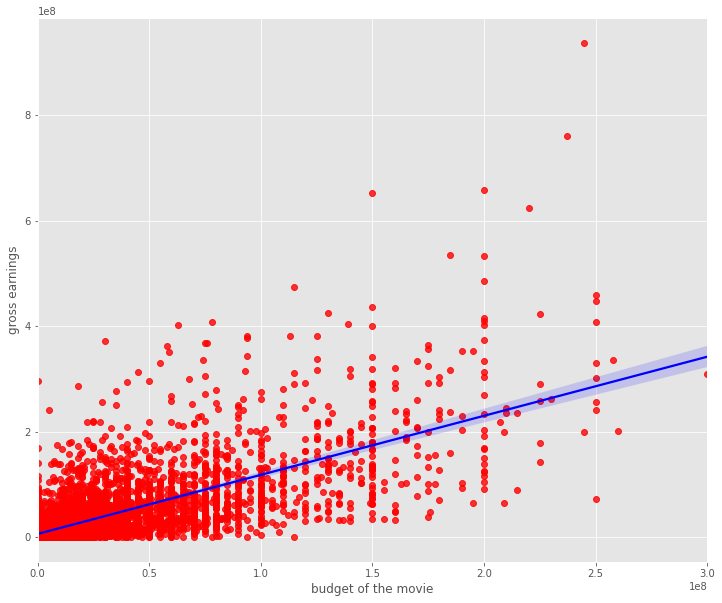

In [32]:
 import seaborn as sns
sns.regplot(x = df['budget'], y = df['gross'], scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.xlabel('budget of the movie')
plt.ylabel('gross earnings')
plt.show()

In [34]:
#Finding correlations
df.corr()

,budget,gross,runtime,score,votes
budget,1.000000,0.712196,0.268226,0.042145,0.503924
gross,0.712196,1.000000,0.224579,0.165693,0.662457
runtime,0.268226,0.224579,1.000000,0.395343,0.317399
score,0.042145,0.165693,0.395343,1.000000,0.393607
votes,0.503924,0.662457,0.317399,0.393607,1.000000


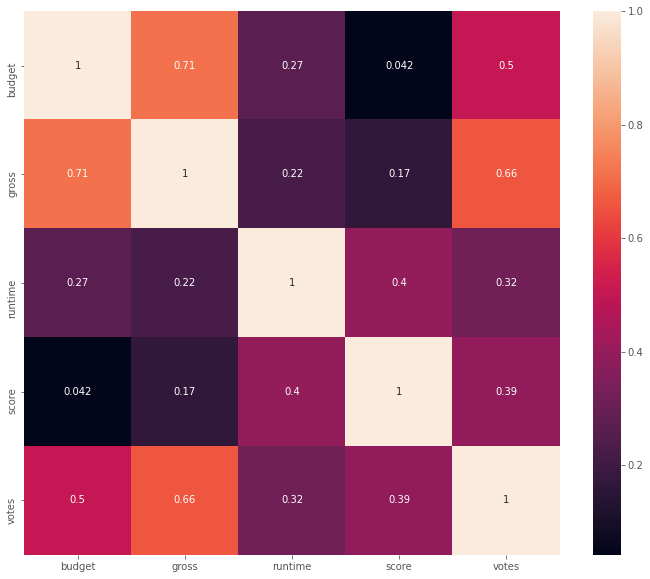

In [35]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot= True)
plt.show()

In [37]:
df_num = df.copy()
for col in df_num.columns:
  if(df_num[col].dtype == 'object'):
    df_num[col] = df_num[col].astype('category')
    df_num[col] = df_num[col].cat.codes

In [41]:
df_num.head(20)

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year_released
0,8000000,665,54,2192,1,52287414,4661,8,89,8.1,2454,299174,3716,0
1,6000000,1680,54,1296,4,70136369,1821,7,103,7.8,1605,264740,1970,0
2,15000000,1680,54,2645,0,179800601,6203,6,110,6.9,2345,236909,1852,0
3,18500000,2062,54,1066,0,85160248,295,8,137,8.4,2192,540152,1629,0
4,9000000,2122,54,2123,1,18564613,1872,6,90,6.9,1139,36636,2549,0
5,6000000,1158,53,1948,6,138530565,3903,8,120,8.1,369,317585,2988,1
6,25000000,1160,53,1207,1,12729917,2883,6,101,7.4,528,102879,977,0
7,6000000,768,54,588,6,8551228,771,8,120,7.8,924,146768,897,0
8,9000000,1680,54,1004,4,40471663,3964,7,96,6.8,1730,60565,1970,0
9,15000000,1854,54,557,6,40456565,5306,8,96,7.5,1039,129698,1333,0


In [40]:
df.head(20)

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year_released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,120,8.1,Charlie Sheen,317585,Oliver Stone,1987
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


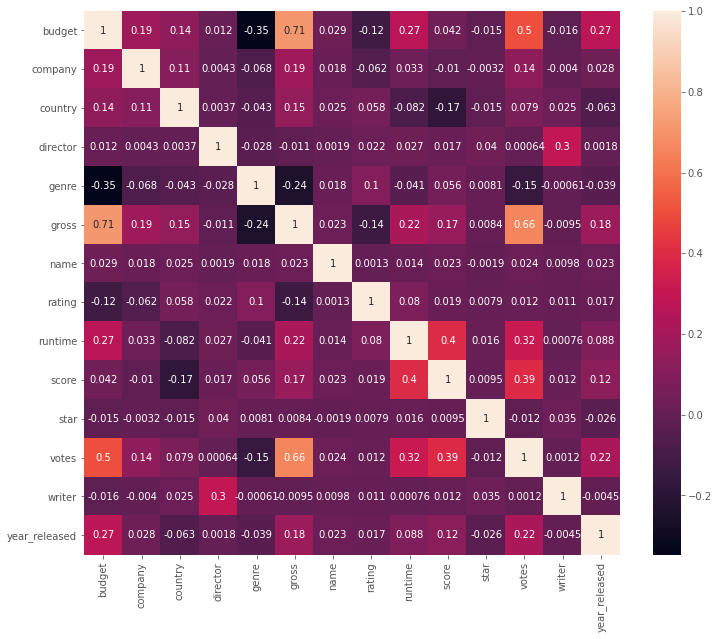

In [42]:
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix,annot= True)
plt.show()

In [44]:
pd.display
corr_mat = df_num.corr()
corr_unstack = corr_mat.unstack()
corr_unstack

budget         budget           1.000000
               company          0.187205
               country          0.137635
               director         0.011602
               genre           -0.346794
                                  ...   
year_released  score            0.117679
               star            -0.026050
               votes            0.220797
               writer          -0.004546
               year_released    1.000000
Length: 196, dtype: float64

In [47]:
pd.set_option('display.max_rows', None)

In [48]:
sorted_pairs = corr_unstack.sort_values()

In [49]:
sorted_pairs

budget         genre           -0.346794
genre          budget          -0.346794
gross          genre           -0.242676
genre          gross           -0.242676
country        score           -0.174414
score          country         -0.174414
votes          genre           -0.150519
genre          votes           -0.150519
gross          rating          -0.135538
rating         gross           -0.135538
               budget          -0.119660
budget         rating          -0.119660
runtime        country         -0.081796
country        runtime         -0.081796
genre          company         -0.068330
company        genre           -0.068330
country        year_released   -0.062707
year_released  country         -0.062707
rating         company         -0.062250
company        rating          -0.062250
genre          country         -0.042793
country        genre           -0.042793
genre          runtime         -0.041357
runtime        genre           -0.041357
year_released  g

In [56]:
pos_corr = sorted_pairs[(sorted_pairs)> 0.5]
neg_corr = sorted_pairs[(sorted_pairs) < -0.3]

In [60]:
pos_corr

votes          budget           0.503924
budget         votes            0.503924
votes          gross            0.662457
gross          votes            0.662457
               budget           0.712196
budget         gross            0.712196
               budget           1.000000
votes          votes            1.000000
star           star             1.000000
score          score            1.000000
runtime        runtime          1.000000
rating         rating           1.000000
name           name             1.000000
gross          gross            1.000000
genre          genre            1.000000
director       director         1.000000
country        country          1.000000
company        company          1.000000
writer         writer           1.000000
year_released  year_released    1.000000
dtype: float64

In [61]:
neg_corr

budget  genre    -0.346794
genre   budget   -0.346794
dtype: float64

Budget and Votes have high correlation with the gross profit
